## This notebook is used for assessing the MassQL query for identifying **dihydroxy BA structures**
(original notebook content: v_all_di_massql_query_for_manuscript_REDO-inchikey.ipynb)

---

### About the process
We isolate unique structures from MS/MS spectra for venn diagram assessment of MassQL Queries as follows:

- Identify unique InchIKey first blocks associated with each MS/MS spectra (M+H adducts)
- SMILES metadata in GNPS for each MS/MS spectra were used to identify the associated compound structure using RDKit
- MS/MS spectra without structural information were removed
- Identify unique InchIKey first blocks to ignore stereochemistry and identify a single, generalized structure described by one of the MS/MS spectra identified in GNPS Libraries

---
### Section 1: Read input data
- dihydroxy-BA metadata in GNPS Library
- cleaned MassQL query output

### Section 2: Identify unique structures in substructure-identified di-BA data
- identify InChIKeys and InChIKey first blocks from SMILES metadata
- identify unique InChIkey first blocks
- filter dataframe to only include data for unique InChIkey first blocks

### Section 3: Identify unique structures in MassQL query data 
- remove rows that do not contain SMILES information in 'Smiles' column
- identify InChIKeys and InChIKey first blocks from SMILES metadata
- identify unique InChIkey first blocks
- filter dataframe to only include data for unique InChIkey first blocks

**NOTE** The purpose of identifying unique InChIkey first blocks is to ignore stereochemistry and identify a single, generalized structure described by one of the MS/MS spectra identified in GNPS Libraries.

---
# Sections for comparing unique structures in MassQL query and substructure-identified BA
### Section 4: Inner structures captured by **BOTH sets**
- identify InChIkey first blocks captured by BOTH sets
- match InChIkey first blocks with metadata to draw and visualize structures
- identify spectra associated with inner structures
- draw structures with associated InChIkey first blocks and example spectrum_id
- get list of spectrum_id to make USI links using https://gnps2.org/ createusi_markdown_workflow

### Section 5: Outer structures **ONLY** captured by **MassQL query**
- identify InChIkey first blocks only captured by query
- visualize structures
- identify spectra associated with outer query structures
- draw structures with associated InChIkey first blocks and example spectrum_id

### Section 6: Outer structures **ONLY** captured by **substructure search**
- identify InChIkey first blocks only captured by query
- visualize structures
- identify spectra associated with outer substructure structures
- draw structures with associated InChIkey first blocks and example spectrum_id

---
# Sections for Visualization
### Section 7: Venn Diagram
### Section 8: Barplots
- shaping barplot data for outer MassQL query results
- shaping barplot data for outer substructure search results
- shaping barplot data for inner results
- plotting

## Input files needed for the Notebook
1. Dataframe output of dihydroxy-BA metadata in GNPS Library from **substructure_search_identify_di_BA.ipynb**
2. Cleaned MassQL query output from **shape_di_BA_msql_output.ipynb**

In [87]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

# for plotting venn diagram
import matplotlib_venn
from matplotlib_venn import venn2

# for plotting barplot
from plotnine import *

## Section 1: Read input data

#### read dihydroxy BA GNPS Library data

In [2]:
# from substructure_search_identify_di_BA.ipynb
library_df_w_all_di = pd.read_csv('/home/jovyan/work/notebooks/outputs/library_df_dihydroxy_BA_only_m+h_updated_matches.csv',sep=',', index_col='spectrum_id')

#### read MassQL output data

In [3]:
# from shape_di_BA_msql_output.ipynb
massql_query_output_matched = pd.read_csv('/home/jovyan/work/notebooks/outputs/massql_all_di_query_peaks_nl_output_matched_for_venn_diagram.csv', sep=',')

In [4]:
massql_query_output_matched = massql_query_output_matched.replace(np.nan, 'N/A')

## Section 2: Identify unique structures in **substructure identified** di BA

In [5]:
# number of dihydroxy bile acid MS/MS spectra with M+H adducts
len(library_df_w_all_di)

690

#### Identify InChIKeys and InChIKey first blocks from SMILES metadata
---
##### **Variables**
- smiles --> SMILES from "Smiles" column for a row in library_df_w_all_di
- mol --> molecule constructed from SMILES string (held in smiles variable) using RDKit
- inchikey --> inchikey constructed from molecule (held in mol variable) using RDKit
- inchikey_first_block --> inchikey_first_block derived from inchikey (held in inchikey variable)

In [6]:
library_df_w_all_di_SMILES_INCHIKEY = {}

In [7]:
for x,y in enumerate(library_df_w_all_di.Smiles.unique()):
    smiles = y
    mol = Chem.MolFromSmiles(y)
    inchikey = Chem.MolToInchiKey(mol)
    inchikey_first_block = inchikey.split('-')[0]
    
    library_df_w_all_di_SMILES_INCHIKEY[x] = [smiles, mol, inchikey, inchikey_first_block]

In [8]:
# make dataframe from dictionary
library_df_w_all_di_SMILES_INCHIKEY_df = pd.DataFrame.from_dict(library_df_w_all_di_SMILES_INCHIKEY, orient='index',
                       columns=['smiles', 'mol', 'inchikey', 'inchikey_first_block'])

#### Need to identify **unique** InChIkey first blocks
- library_df_w_all_di_SMILES_INCHIKEY_df still includes inchikey_first_block repeats

In [9]:
# identify unique InChIkey first blocks by counting first instance
unique_library_df_w_all_di_SMILES_INCHIKEY_df = []

for item in library_df_w_all_di_SMILES_INCHIKEY_df.inchikey_first_block: 
    if item not in unique_library_df_w_all_di_SMILES_INCHIKEY_df: 
        unique_library_df_w_all_di_SMILES_INCHIKEY_df.append(item) 
        
len(unique_library_df_w_all_di_SMILES_INCHIKEY_df)

106

In [10]:
# list of unique InChIkey first blocks
unique_library_df_w_all_di_SMILES_INCHIKEY_df

['CEMZGPKUKMFNNF',
 'CYHFCBVFHBCQHF',
 'LJAIXMQYBNEUSB',
 'BAOWHAJSJGJSBV',
 'RFRCQJKUNLZBAM',
 'CDNGTOVFEUSMMG',
 'WKNSSWRPDRZCAQ',
 'HHGKPVQSNIVPPF',
 'RUDATBOHQWOJDD',
 'WVULKSPCQVQLCU',
 'BHTRKEVKTKCXOH',
 'KXGVEGMKQFWNSR',
 'FHHPUSMSKHSNKW',
 'GHCZAUBVMUEKKP',
 'AWDRATDZQPNJFN',
 'HMXPOCDLAFAFNT',
 'RIGHMQLKMHLMQD',
 'NNEIBJNHWVDJBA',
 'GDNGOAUIUTXUES',
 'UCVGCHGIKFWAGH',
 'YZYBIGOLMMAZFK',
 'SVWHITUXVZXJRQ',
 'CJLZGUJUXDRHJQ',
 'SLDVWYDDPPFGHK',
 'WYFHJKKXWBYZIM',
 'WHMOBEGYTDWMIG',
 'HQPHGZUTNNVZLH',
 'YFAWUWYZXIKWSJ',
 'GLVWZDCWCRWVFM',
 'CBTSGRWRWACHRS',
 'CIICTINKDWKIAB',
 'KUXSAFRZQPYINU',
 'YKGWNUNKCNTZLA',
 'UXAHTIGXQXJADE',
 'HVNRNWTTWOOXEC',
 'YTHIOIIKGOBXQQ',
 'CYUZUFOPGIQGBF',
 'ARGCPGOJOKCMSW',
 'IGVZUMPVFZKTRH',
 'MIGXYHMLYVAUQT',
 'MHOZNCAVRHAOKT',
 'TZJSDNVVGFIRIY',
 'CHFOVLMTXSAFKC',
 'FDLBWFQZCBIUPV',
 'XTVWUFJAQMCVQZ',
 'DWKUILAFNXKAFN',
 'HBYDOWCFSJCMMZ',
 'RSENRUOYAHKCHG',
 'GBDRWAMVZYSZPP',
 'ZJVHCRHSSTUJRW',
 'TVNLAWCTCXPKQY',
 'GADRVMPNTDRMDU',
 'UUMHESNLNM

#### Filter library_df_w_all_di_SMILES_INCHIKEY_df to only include unique InChIkey first blocks

In [11]:
library_df_w_all_di_SMILES_INCHIKEY_df_no_dup = library_df_w_all_di_SMILES_INCHIKEY_df.drop_duplicates(subset=['inchikey_first_block'])

In [12]:
library_df_w_all_di_SMILES_INCHIKEY_df_no_dup

,smiles,mol,inchikey,inchikey_first_block
0,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224e80>,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF
1,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad225a20>,CYHFCBVFHBCQHF-UHFFFAOYSA-N,CYHFCBVFHBCQHF
3,CC(C1CCC2C3(C(CC4(CC(CCC4(C3CCC21C)C)O)[H])O)[...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224d60>,LJAIXMQYBNEUSB-UHFFFAOYSA-N,LJAIXMQYBNEUSB
4,C[CH](CCC(N[CH](CC(C)C)C(O)=O)=O)[CH]1CC[C]2([...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224ee0>,BAOWHAJSJGJSBV-UHFFFAOYSA-N,BAOWHAJSJGJSBV
5,C[C@@H]([C@H]1CC[C@]2([C@@]3(CC[C@@]4(C[C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad225900>,RFRCQJKUNLZBAM-SYIRRQCNSA-N,RFRCQJKUNLZBAM
...,...,...,...,...
173,O=C(OC1CC(CC(O)C2C3CCC4(C)C2CCC4C(CCC(O)=O)C)C...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad282140>,WGQJYPHDKYRBOD-UHFFFAOYSA-N,WGQJYPHDKYRBOD
174,O=C(O)CNC(=O)CCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3C...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2821a0>,DLOTUJUSJVIXDW-UHFFFAOYSA-N,DLOTUJUSJVIXDW
175,O=C(NCC1=NC=CC=C1)CCC(C)C2CCC3C4CCC5CC(O)CCC5(...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad282200>,MQDDJIPAADLFAB-UHFFFAOYSA-N,MQDDJIPAADLFAB
177,O=C(N1CCN(CC=2C=CC=CC2)CC1)CCC(C)C3CCC4C5CCC6C...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2822c0>,UTMFIKFVXBHDRL-UHFFFAOYSA-N,UTMFIKFVXBHDRL


## Section 3: Identify unique structures in **MassQL query** data

In [13]:
# remove rows from MassQL query output without SMILES data in 'Smiles' column
massql_query_output_matched_SMILES = massql_query_output_matched[(massql_query_output_matched.Smiles != " ") & (massql_query_output_matched.Smiles != "N/A")]

In [14]:
# number of MS/MS spectra with M+H adducts
len(massql_query_output_matched_SMILES)

317

#### Identify InChIKeys and InChIKey first blocks from SMILES metadata
---
##### **Variables**
- smiles --> SMILES from "Smiles" column for a row in library_df_w_all_di
- mol --> molecule constructed from SMILES string (held in smiles variable) using RDKit
- inchikey --> inchikey constructed from molecule (held in mol variable) using RDKit
- inchikey_first_block --> inchikey_first_block derived from inchikey (held in inchikey variable)

In [15]:
massql_query_output_matched_SMILES_INCHIKEY = {}

In [16]:
for x,y in enumerate(massql_query_output_matched_SMILES.Smiles.unique()):
    smiles = y
    mol = Chem.MolFromSmiles(y)
    inchikey = Chem.MolToInchiKey(mol)
    inchikey_first_block = inchikey.split('-')[0]
    
    massql_query_output_matched_SMILES_INCHIKEY[x] = [smiles, mol, inchikey, inchikey_first_block]

In [17]:
# make dataframe from dictionary
massql_query_output_matched_SMILES_INCHIKEY_df = pd.DataFrame.from_dict(massql_query_output_matched_SMILES_INCHIKEY, orient='index',
                       columns=['smiles', 'mol', 'inchikey', 'inchikey_first_block'])

#### Need to identify **unique** InChIkey first blocks
- massql_query_output_matched_SMILES_INCHIKEY_df still includes inchikey_first_block repeats

In [18]:
# identify unique InChIkey first blocks by counting first instance
unique_massql_query_output_matched_SMILES_INCHIKEY_df = []

for item in massql_query_output_matched_SMILES_INCHIKEY_df.inchikey_first_block: 
    if item not in unique_massql_query_output_matched_SMILES_INCHIKEY_df: 
        unique_massql_query_output_matched_SMILES_INCHIKEY_df.append(item) 
        
len(unique_massql_query_output_matched_SMILES_INCHIKEY_df)

80

In [19]:
# list of unique InChIkey first blocks
unique_massql_query_output_matched_SMILES_INCHIKEY_df

['UTGBBPSEQPITLF',
 'CYHFCBVFHBCQHF',
 'CEMZGPKUKMFNNF',
 'LJAIXMQYBNEUSB',
 'BAOWHAJSJGJSBV',
 'RFRCQJKUNLZBAM',
 'CDNGTOVFEUSMMG',
 'WKNSSWRPDRZCAQ',
 'HHGKPVQSNIVPPF',
 'BHTRKEVKTKCXOH',
 'GHCZAUBVMUEKKP',
 'AWDRATDZQPNJFN',
 'HMXPOCDLAFAFNT',
 'RIGHMQLKMHLMQD',
 'KIQFUORWRVZTHT',
 'OTRAYPQDIGAWSD',
 'LKUNZSUKADSCME',
 'SMEROWZSTRWXGI',
 'FAYYTQMQTAKHRM',
 'YZYBIGOLMMAZFK',
 'SVWHITUXVZXJRQ',
 'CJLZGUJUXDRHJQ',
 'WVULKSPCQVQLCU',
 'WYFHJKKXWBYZIM',
 'HQPHGZUTNNVZLH',
 'YFAWUWYZXIKWSJ',
 'YKGWNUNKCNTZLA',
 'UXAHTIGXQXJADE',
 'YTHIOIIKGOBXQQ',
 'WURGVTTXAYJRCC',
 'MIGXYHMLYVAUQT',
 'MHOZNCAVRHAOKT',
 'TZJSDNVVGFIRIY',
 'CHFOVLMTXSAFKC',
 'FDLBWFQZCBIUPV',
 'DWKUILAFNXKAFN',
 'HBYDOWCFSJCMMZ',
 'RSENRUOYAHKCHG',
 'GBDRWAMVZYSZPP',
 'TVNLAWCTCXPKQY',
 'GADRVMPNTDRMDU',
 'UUMHESNLNMWIQK',
 'KRBJOAIDSTYRMG',
 'KRXFBWAVDGDSRN',
 'AWEROTVTOHXZSU',
 'CBETXCRGHYBMPS',
 'FLXKZFGVFOVEJM',
 'ZDFLHZVTXWIGQV',
 'QTMPUVRWTSAYOC',
 'JETMSKKNSNPVER',
 'LKUHGQIXJRDHNR',
 'BHWXBRBFQBOUAF',
 'QZPAFDYRAF

#### Filter massql_query_output_matched_SMILES_INCHIKEY_df to only include unique InChIkey first blocks

In [20]:
massql_query_output_matched_SMILES_INCHIKEY_df_no_dup = massql_query_output_matched_SMILES_INCHIKEY_df.drop_duplicates(subset=['inchikey_first_block'])

In [21]:
massql_query_output_matched_SMILES_INCHIKEY_df_no_dup

,smiles,mol,inchikey,inchikey_first_block
0,O=C1C(O)=C([C@H](C)CO)[C@]2([H])[C@]1(C)C/C=C(...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad225d80>,UTGBBPSEQPITLF-URCDZZQSSA-N,UTGBBPSEQPITLF
1,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad226200>,CYHFCBVFHBCQHF-UHFFFAOYSA-N,CYHFCBVFHBCQHF
2,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad226260>,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF
3,CC(C1CCC2C3(C(CC4(CC(CCC4(C3CCC21C)C)O)[H])O)[...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2262c0>,LJAIXMQYBNEUSB-UHFFFAOYSA-N,LJAIXMQYBNEUSB
4,C[CH](CCC(N[CH](CC(C)C)C(O)=O)=O)[CH]1CC[C]2([...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2263e0>,BAOWHAJSJGJSBV-UHFFFAOYSA-N,BAOWHAJSJGJSBV
...,...,...,...,...
121,C[C@H](CCC(N1C(C(O)=O)CCC1)=O)[C@H]2CC[C@@]3([...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2b2da0>,CBUDWRGEUSIPLO-OPPBNAOESA-N,CBUDWRGEUSIPLO
122,C[C@H](CCC(N[C@@H](CCCN)C(O)=O)=O)[C@H]1CC[C@@...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2b2e00>,CTAHXWGVRNBACS-BYCFKNDHSA-N,CTAHXWGVRNBACS
125,C[C@H](CCC(N[C@H](C(O)=O)CCCN)=O)[C@H]1CC[C@@]...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2b2f20>,ZJVHCRHSSTUJRW-PVTYGFSNSA-N,ZJVHCRHSSTUJRW
126,[H][C@]12CC[C@@]3([H])[C@]4([H])CC[C@]([H])([C...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad2b2f80>,KXGVEGMKQFWNSR-LLQZFEROSA-N,KXGVEGMKQFWNSR


## Sections for comparing unique structures

### Section 4: Inner structures captured by **BOTH SETS**

#### Identify InChIkey first blocks captured by BOTH sets

In [22]:
# comparing list of unique InChIkey first blocks to identify inner set of shared structures found by both methods
inner = [value for value in unique_massql_query_output_matched_SMILES_INCHIKEY_df if value in unique_library_df_w_all_di_SMILES_INCHIKEY_df]

In [23]:
# list of shared InChIkey first blocks
inner

['CYHFCBVFHBCQHF',
 'CEMZGPKUKMFNNF',
 'LJAIXMQYBNEUSB',
 'BAOWHAJSJGJSBV',
 'RFRCQJKUNLZBAM',
 'CDNGTOVFEUSMMG',
 'WKNSSWRPDRZCAQ',
 'HHGKPVQSNIVPPF',
 'BHTRKEVKTKCXOH',
 'GHCZAUBVMUEKKP',
 'AWDRATDZQPNJFN',
 'HMXPOCDLAFAFNT',
 'RIGHMQLKMHLMQD',
 'YZYBIGOLMMAZFK',
 'SVWHITUXVZXJRQ',
 'CJLZGUJUXDRHJQ',
 'WVULKSPCQVQLCU',
 'WYFHJKKXWBYZIM',
 'HQPHGZUTNNVZLH',
 'YFAWUWYZXIKWSJ',
 'YKGWNUNKCNTZLA',
 'UXAHTIGXQXJADE',
 'YTHIOIIKGOBXQQ',
 'MIGXYHMLYVAUQT',
 'MHOZNCAVRHAOKT',
 'TZJSDNVVGFIRIY',
 'CHFOVLMTXSAFKC',
 'FDLBWFQZCBIUPV',
 'DWKUILAFNXKAFN',
 'HBYDOWCFSJCMMZ',
 'RSENRUOYAHKCHG',
 'GBDRWAMVZYSZPP',
 'TVNLAWCTCXPKQY',
 'GADRVMPNTDRMDU',
 'UUMHESNLNMWIQK',
 'KRBJOAIDSTYRMG',
 'KRXFBWAVDGDSRN',
 'AWEROTVTOHXZSU',
 'CBETXCRGHYBMPS',
 'FLXKZFGVFOVEJM',
 'ZDFLHZVTXWIGQV',
 'QTMPUVRWTSAYOC',
 'JETMSKKNSNPVER',
 'LKUHGQIXJRDHNR',
 'BHWXBRBFQBOUAF',
 'QZPAFDYRAFLSMC',
 'ILNZVSWWWDJWPL',
 'LXYFNICVBDMTSH',
 'NABZNAJLBCRTJM',
 'RVPFAKQTPDHESL',
 'WOBPBTDFDODUKX',
 'XQJIILAERQSYBD',
 'NRZUDIYVZC

In [29]:
# number of shared InChIkey first blocks
len(inner)

73

#### match InChIkey first blocks with metadata to draw and visualize structures

In [24]:
# match shared InChIkey first blocks with metadata describing smiles, mol, inchikey, and inchikey_first_block data
inner_df_examples = library_df_w_all_di_SMILES_INCHIKEY_df_no_dup[library_df_w_all_di_SMILES_INCHIKEY_df_no_dup['inchikey_first_block'].isin(inner)]

In [25]:
# dataframe to draw and visualize structures
inner_df_examples

,smiles,mol,inchikey,inchikey_first_block
0,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224e80>,CEMZGPKUKMFNNF-UHFFFAOYSA-N,CEMZGPKUKMFNNF
1,CC(C1CCC2C1(C)CCC3C2C(O)CC4C3(C)CCC(O)C4)CCC(N...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad225a20>,CYHFCBVFHBCQHF-UHFFFAOYSA-N,CYHFCBVFHBCQHF
3,CC(C1CCC2C3(C(CC4(CC(CCC4(C3CCC21C)C)O)[H])O)[...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224d60>,LJAIXMQYBNEUSB-UHFFFAOYSA-N,LJAIXMQYBNEUSB
4,C[CH](CCC(N[CH](CC(C)C)C(O)=O)=O)[CH]1CC[C]2([...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad224ee0>,BAOWHAJSJGJSBV-UHFFFAOYSA-N,BAOWHAJSJGJSBV
5,C[C@@H]([C@H]1CC[C@]2([C@@]3(CC[C@@]4(C[C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad225900>,RFRCQJKUNLZBAM-SYIRRQCNSA-N,RFRCQJKUNLZBAM
...,...,...,...,...
128,C[C@H](CCC(N[C@@H](C(C)O)C(O)=O)=O)[C@H]1CC[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad281060>,DIPFIEWKTZWRRS-AEUJFUGESA-N,DIPFIEWKTZWRRS
130,C[C@H](CCC(N[C@@H](CC1=CC=C(O)C=C1)C(O)=O)=O)[...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad281120>,JCVJAOJXYPLYNK-FWTLTIHGSA-N,JCVJAOJXYPLYNK
131,C[C@H](CCC(N[C@@H](C(C)C)C(O)=O)=O)[C@H]1CC[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad281180>,STPSGKIPCULXDW-RZUWVZROSA-N,STPSGKIPCULXDW
152,C[C@H](CCC(N[C@H](C(O)=O)CS)=O)[C@H]1CC[C@@]2(...,<rdkit.Chem.rdchem.Mol object at 0x7f30ad281960>,DRHWEOCRWKAERA-YZOSPPSKSA-N,DRHWEOCRWKAERA


#### Identify example spectra associated with inner structures
- for visualizing structure with InChIkey first blocks and example spectrum_id

##### Isolate spectra with diagnostic peaks
Because the dihydroxy BA identified in library_df_w_all_di were found using substructure, we cannot guarantee their associated MS/MS have the diagnotic peaks we are looking for. For the sake of figure generation for the manuscript and to ensure the example spectra provided are consistent with what is expected, the below code filters MS/MS for those that contain the expected diagnostic peaks.

In [26]:
library_df_w_all_di_reset_index = library_df_w_all_di.reset_index()

In [27]:
lib_spectra_with_diag_peaks = []
for x,y in library_df_w_all_di_reset_index.iterrows():
    peaks = library_df_w_all_di_reset_index.peaks_json[x]
    if peaks.find('[339.2') != -1 and peaks.find('[321.2') != -1 and peaks.find('[215.1') != -1:
        lib_spectra_with_diag_peaks.append(library_df_w_all_di_reset_index.spectrum_id[x])

In [28]:
# list of spectrum_id that describe MS/MS that have the expected diagnostic peaks (460 MS/MS out of the 690 MS/MS)
len(lib_spectra_with_diag_peaks)

460

##### MS/MS spectra that describe inner structures but are **NOT confirmed to have all diagnostic peaks**

In [29]:
library_df_w_all_di_inner =  library_df_w_all_di[library_df_w_all_di['Smiles'].isin(inner_df_examples.smiles)].reset_index()

In [30]:
library_df_w_all_di_inner_no_dup = library_df_w_all_di_inner.drop_duplicates(subset=['Smiles'])

##### MS/MS spectra that describe inner structures **AND have all diagnostic peaks**

In [31]:
library_df_w_all_di_inner_no_dup_with_peaks = library_df_w_all_di_inner_no_dup[library_df_w_all_di_inner_no_dup['spectrum_id'].isin(lib_spectra_with_diag_peaks)]

##### identify if there are any missing spectrum_id from the expected 73 inner captured structures due to lack of diagnostic peaks
Substract the spectrum_id of MS/MS spectra that describe inner structures but are **NOT confirmed to have all diagnostic peaks** from MS/MS spectra that describe inner structures **AND have all diagnostic peaks**.

In [32]:
# spectrum_id with missing diagnostic peaks
set(library_df_w_all_di_inner_no_dup.spectrum_id) - set(library_df_w_all_di_inner_no_dup_with_peaks.spectrum_id)

{'CCMSLIB00005720571'}

##### identify what structure corresponds to spectrum_id (using InChIKey data)
For the sake of figure generation and providing consistent examples in the manuscript, we will use spectral data from massql query output as the example MS/MS for the same structure described by spectrum_id CCMSLIB00005720571.

In [33]:
library_df_w_all_di_inner_no_dup[library_df_w_all_di_inner_no_dup['spectrum_id'] == 'CCMSLIB00005720571'][['spectrum_id','InChIKey_smiles']]

,spectrum_id,InChIKey_smiles
16,CCMSLIB00005720571,KXGVEGMKQFWNSR-LLQZFEROSA-N


In [35]:
# identify spectrum_id from massql_query_output that matches the InChIKey of the missing spectra from the GNPS Library dataset
massql_query_output_matched_SMILES[massql_query_output_matched_SMILES['InChIKey_smiles'] == 'KXGVEGMKQFWNSR-LLQZFEROSA-N'][['spectrum_id','InChIKey_smiles']]

,spectrum_id,InChIKey_smiles
303,CCMSLIB00006581891,KXGVEGMKQFWNSR-LLQZFEROSA-N


##### shaping data to draw structures with associated InChIkey first blocks and example spectrum_id
To ensure all structures described in inner_df_examples have appropriate structural and spectral data, we must merge the data from library_df_w_all_di_inner_no_dup_with_peaks describing 72 MS/MS with the single row of MS/MS data from the MassQL dataset.

---
InChIKey structural data is included to facilitate the final merge with inner_df_examples.

In [36]:
# spectral and structural data describing 72 out of the 73 structures in inner_df_examples
library_to_merge = library_df_w_all_di_inner_no_dup_with_peaks[['spectrum_id','InChIKey_smiles']]

In [37]:
# spectral and structural data describing 1 out of the 73 structures in inner_df_examples
massql_to_merge = massql_query_output_matched_SMILES[massql_query_output_matched_SMILES['InChIKey_smiles'] == 'KXGVEGMKQFWNSR-LLQZFEROSA-N'][['spectrum_id','InChIKey_smiles']]

##### merge spectral and structural data

In [38]:
merged_inner = pd.concat([library_to_merge, massql_to_merge], ignore_index = True)

In [39]:
# derive InChIkey first blocks from 'InChIKey_smiles' column data
merged_inner['first_block'] = [item.split('-')[0] for item in merged_inner['InChIKey_smiles']]

##### merge structural data with inner_df_examples on structrual (InChIkey first block) data

In [40]:
inner_df_examples_spectra_merged = pd.merge(inner_df_examples, merged_inner[['first_block','spectrum_id']], left_on='inchikey_first_block', right_on='first_block', how='left')

##### make legend describing InChIkey first blocks and spectrum_id to show under structure

In [41]:
legend_inner = [inchikey_first_block +" : "+ spec_id for inchikey_first_block,spec_id in zip(inner_df_examples_spectra_merged['inchikey_first_block'], inner_df_examples_spectra_merged['spectrum_id'])]

#### Draw structures with associated InChIkey first blocks and example spectrum_id

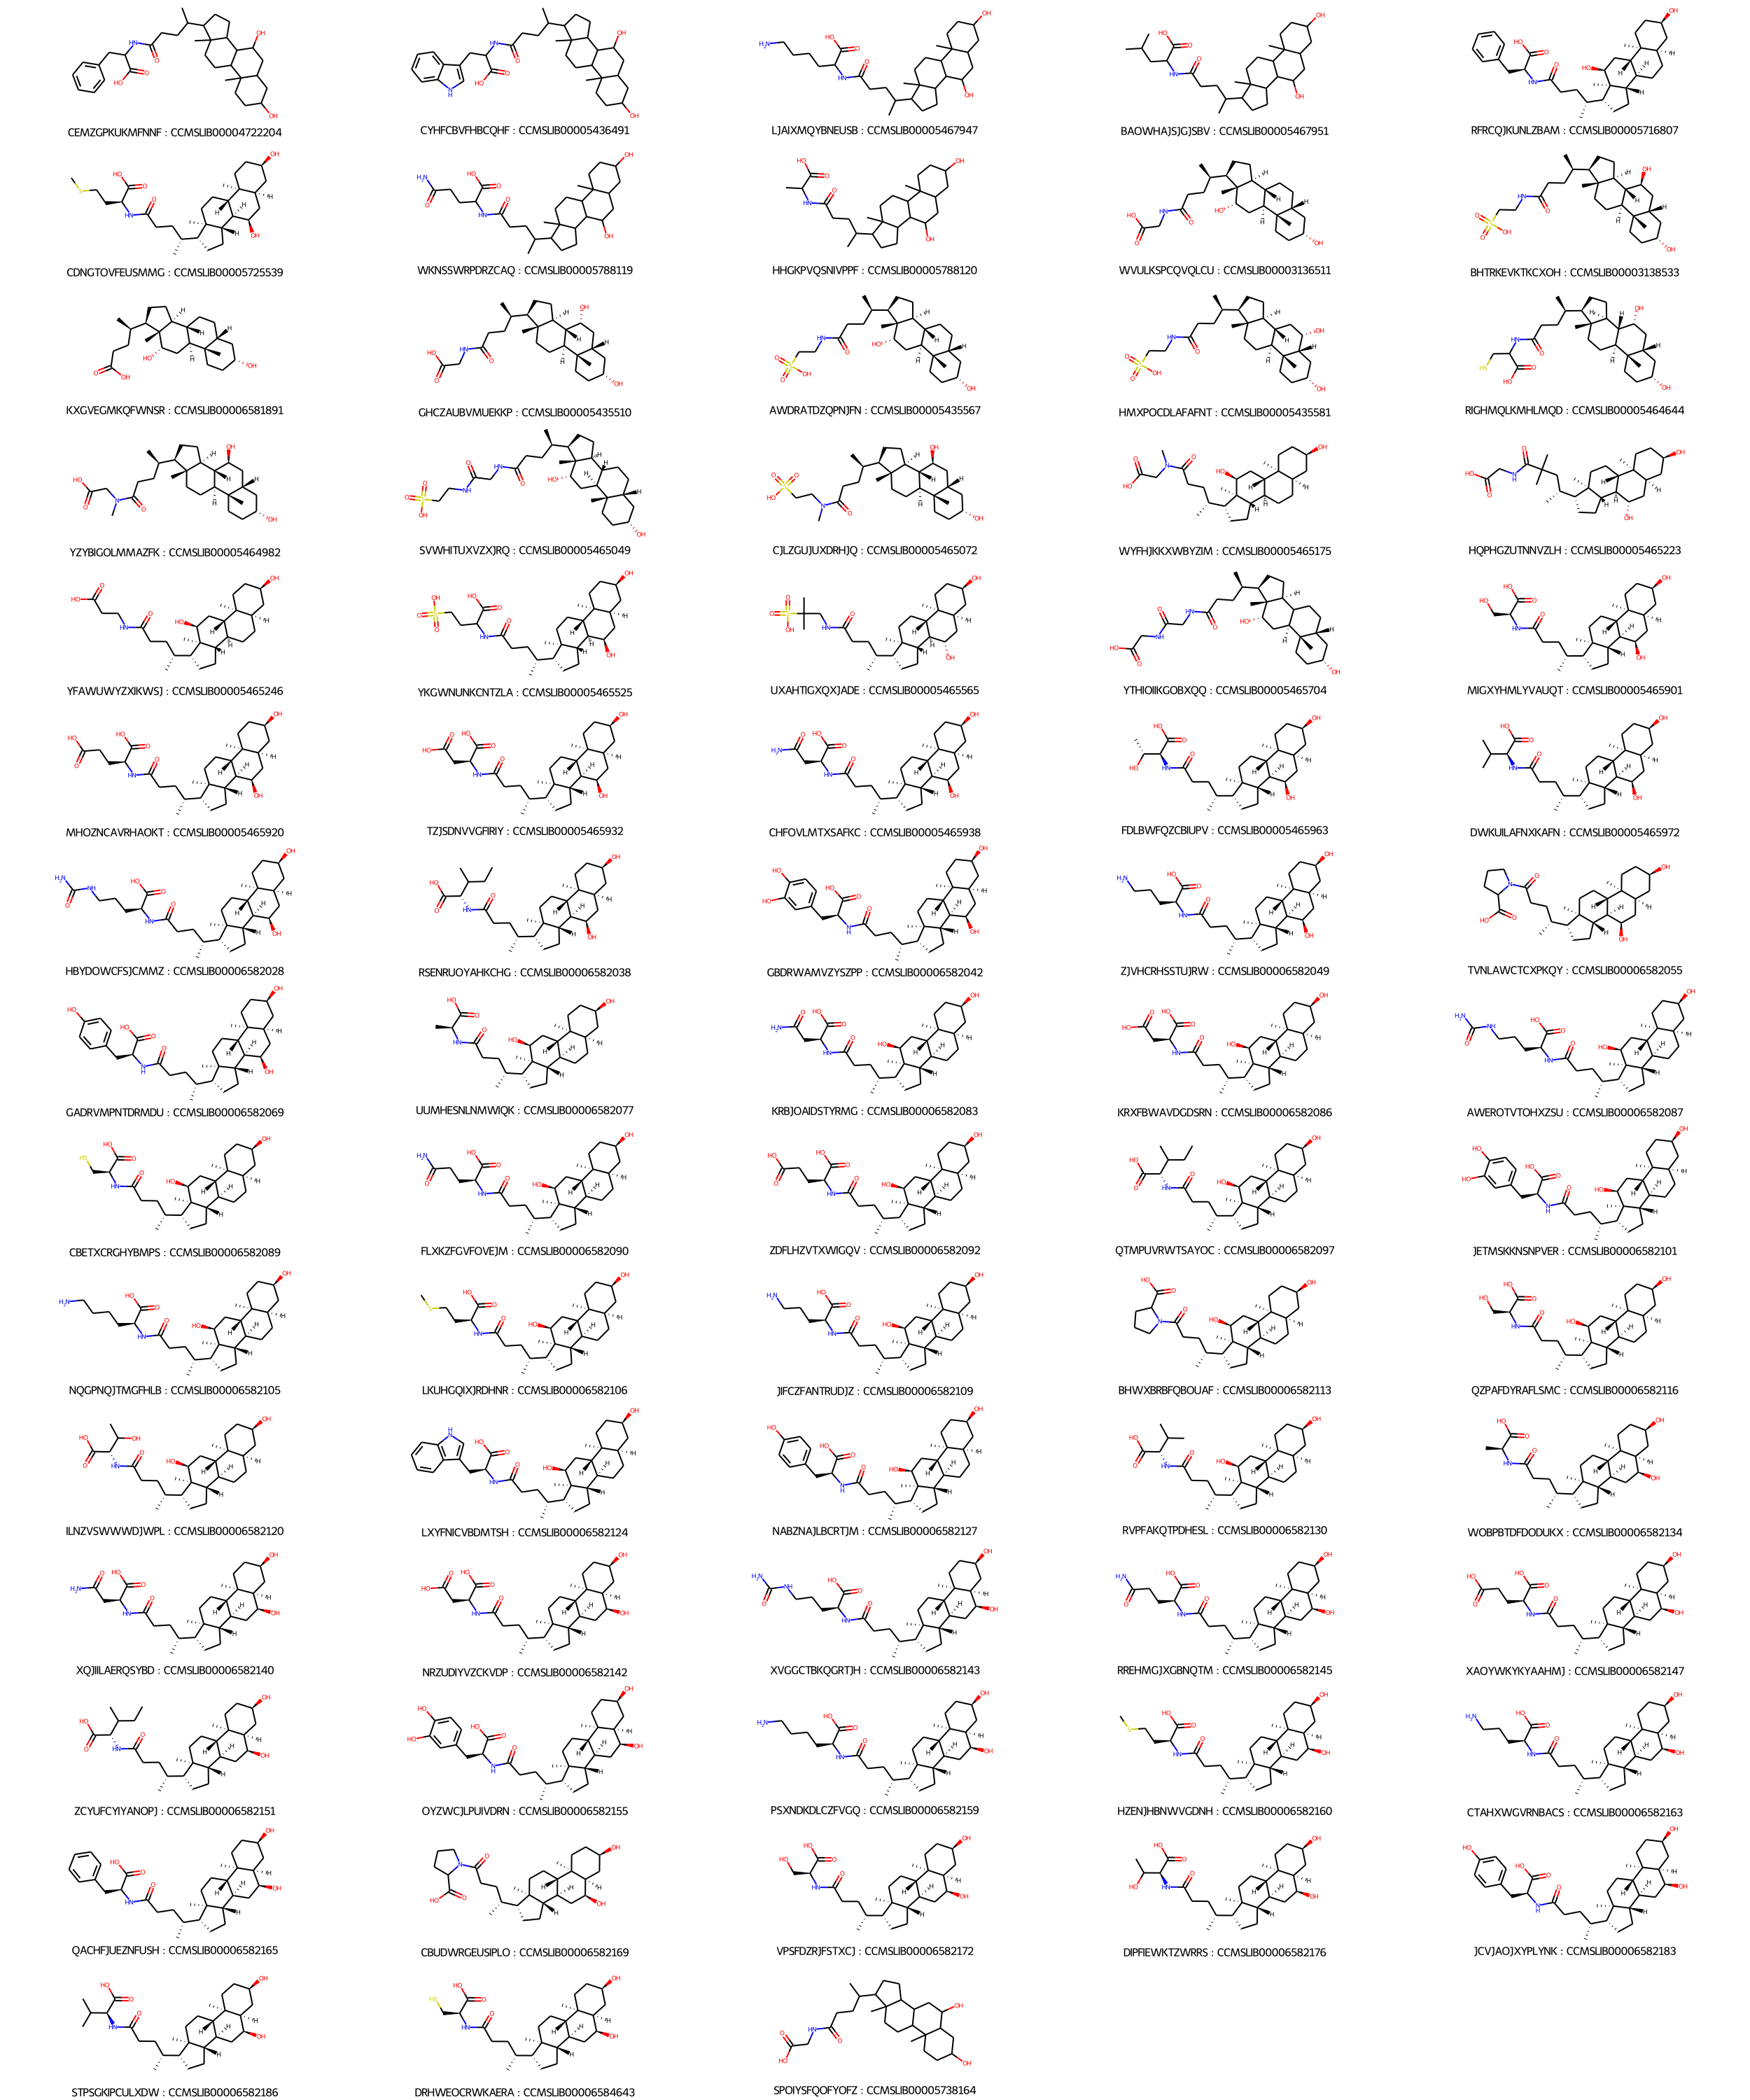

In [42]:
Draw.MolsToGridImage(inner_df_examples_spectra_merged.mol, molsPerRow = 5,subImgSize=(500,200), useSVG = False, maxMols=100,
                    legends=legend_inner)

#### get list of spectrum_id to make USI links

In [43]:
USI_link_beginning = 'mzspec:GNPS:GNPS-LIBRARY:accession:'

In [44]:
full_usi_inner = [USI_link_beginning + spectrum_id for spectrum_id in inner_df_examples_spectra_merged.spectrum_id.to_list()]

In [45]:
usi_output_inner = pd.DataFrame(full_usi_inner, columns=['usi'])

In [409]:
# original name: SI_fig_6_both_methods_DBA_msql_USI_all.csv
usi_output_inner.to_csv("both_methods_Di_BA_msql_USI_all.csv")

### Section 5: Outer structures **ONLY** captured by **MassQL Query**

In [46]:
# identify structures only identified by MassQL query by excluding rows from dataframe related to inner structures
outer_MassQL_only = massql_query_output_matched_SMILES_INCHIKEY_df_no_dup[~massql_query_output_matched_SMILES_INCHIKEY_df_no_dup['inchikey_first_block'].isin(inner)]

In [47]:
# number of InChIkey first blocks only captured by MassQL
len(outer_MassQL_only)

7

#### Identify example spectra associated with outer structures exclusively identified by MassQL query
- for visualizing structure with InChIkey first blocks and example spectrum_id

In [48]:
# spectra data associated with outer structures exclusively identified by query
massql_query_output_matched_SMILES_outer_MassQL_only =  massql_query_output_matched_SMILES[massql_query_output_matched_SMILES['Smiles'].isin(outer_MassQL_only.smiles)]

In [49]:
massql_query_output_matched_SMILES_outer_MassQL_only_no_dup = massql_query_output_matched_SMILES_outer_MassQL_only.drop_duplicates(subset=['Smiles'])

In [50]:
# derive InChIkey first blocks from 'InChIKey_smiles' column data to facilitate the final merge with outer_MassQL_only
massql_query_output_matched_SMILES_outer_MassQL_only_no_dup['first_block'] = [item.split('-')[0] for item in massql_query_output_matched_SMILES_outer_MassQL_only_no_dup['InChIKey_smiles']]

##### merge structural data with outer_MassQL_only on structrual (InChIkey first block) data

In [51]:
outer_MassQL_only_library_merged = pd.merge(outer_MassQL_only, massql_query_output_matched_SMILES_outer_MassQL_only_no_dup[['first_block','spectrum_id']], left_on='inchikey_first_block', right_on='first_block', how='left')

##### make legend describing InChIkey first blocks and spectrum_id to show under structure

In [52]:
massql_only_legend = [inchikey_first_block +" : "+ spec_id for inchikey_first_block,spec_id in zip(outer_MassQL_only_library_merged['inchikey_first_block'], outer_MassQL_only_library_merged['spectrum_id'])]

#### Draw structures with associated InChIkey first blocks and example spectrum_id

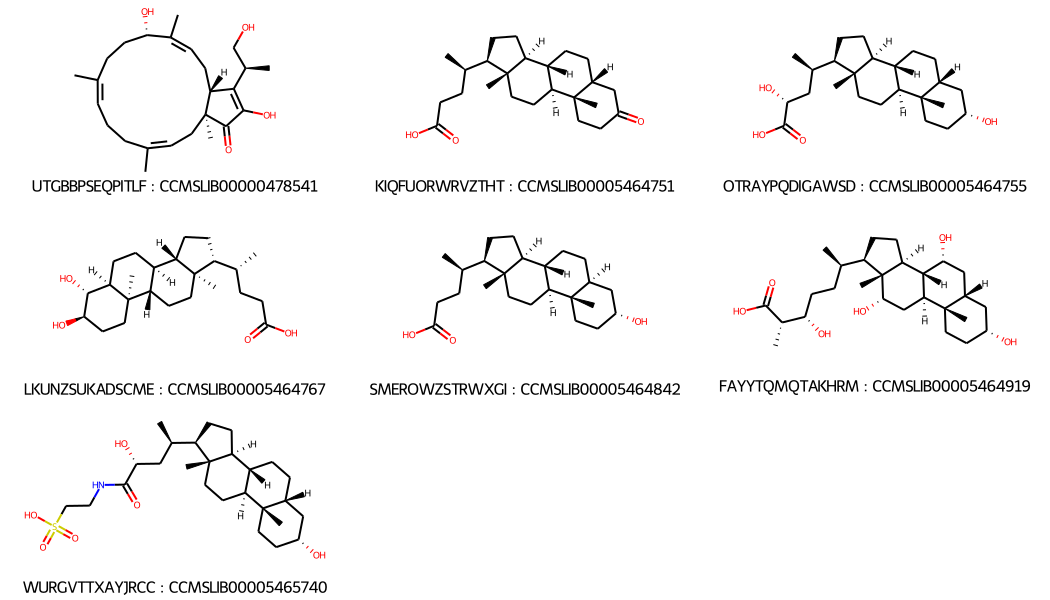

In [53]:
Draw.MolsToGridImage(outer_MassQL_only_library_merged.mol,subImgSize=(350,200), useSVG = False, maxMols=100,
                    legends=massql_only_legend)

#### get list of spectrum_id to make USI links

In [54]:
full_usi_outer_massql = [USI_link_beginning + spectrum_id for spectrum_id in outer_MassQL_only_library_merged.spectrum_id.to_list()]

In [45]:
usi_outer_massql = pd.DataFrame(full_usi_outer_massql, columns=['usi'])

In [409]:
# original name: SI_fig_3_exclusive_DBA_msql_USI
usi_outer_massql.to_csv("exclusively_massql_Di_BA_msql_USI.csv")

### Section 6: Outer structures **ONLY** captured by **substructure search**

In [56]:
# identify structures only identified by substructure search by excluding rows from dataframe related to inner structures
outer_substructure_search_only =  library_df_w_all_di_SMILES_INCHIKEY_df_no_dup[~library_df_w_all_di_SMILES_INCHIKEY_df_no_dup['inchikey_first_block'].isin(inner)]

In [57]:
# number of InChIkey first blocks only captured by substructure search
len(outer_substructure_search_only)

33

#### Identify example spectra associated with outer structures exclusively identified by substructure search
- for visualizing structure with InChIkey first blocks and example spectrum_id

In [63]:
# spectra data associated with outer structures exclusively identified by substructure search
library_df_w_all_di_outer_substructure_search_only =  library_df_w_all_di[library_df_w_all_di['Smiles'].isin(outer_substructure_search_only.smiles)].reset_index()

In [64]:
library_df_w_all_di_outer_substructure_search_only_no_dup = library_df_w_all_di_outer_substructure_search_only.drop_duplicates(subset=['Smiles'])

In [65]:
# derive InChIkey first blocks from 'InChIKey_smiles' column data to facilitate the final merge with outer_substructure_search_only
library_df_w_all_di_outer_substructure_search_only_no_dup['first_block'] = [item.split('-')[0] for item in library_df_w_all_di_outer_substructure_search_only_no_dup['InChIKey_smiles']]

/tmp/ipykernel_18499/133545396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  library_df_w_all_di_outer_substructure_search_only_no_dup['first_block'] = [item.split('-')[0] for item in library_df_w_all_di_outer_substructure_search_only_no_dup['InChIKey_smiles']]


##### merge structural data with outer_substructure_search_only on structrual (InChIkey first block) data

In [66]:
outer_substructure_search_only_library_merged = pd.merge(outer_substructure_search_only, library_df_w_all_di_outer_substructure_search_only_no_dup[['first_block','spectrum_id']], left_on='inchikey_first_block', right_on='first_block', how='left')

##### make legend describing InChIkey first blocks and spectrum_id to show under structure

In [67]:
substruct_only_legend = [inchikey_first_block +" : "+ spec_id for inchikey_first_block,spec_id in zip(outer_substructure_search_only_library_merged['inchikey_first_block'], outer_substructure_search_only_library_merged['spectrum_id'])]

#### Draw structures with associated InChIkey first blocks and example spectrum_id

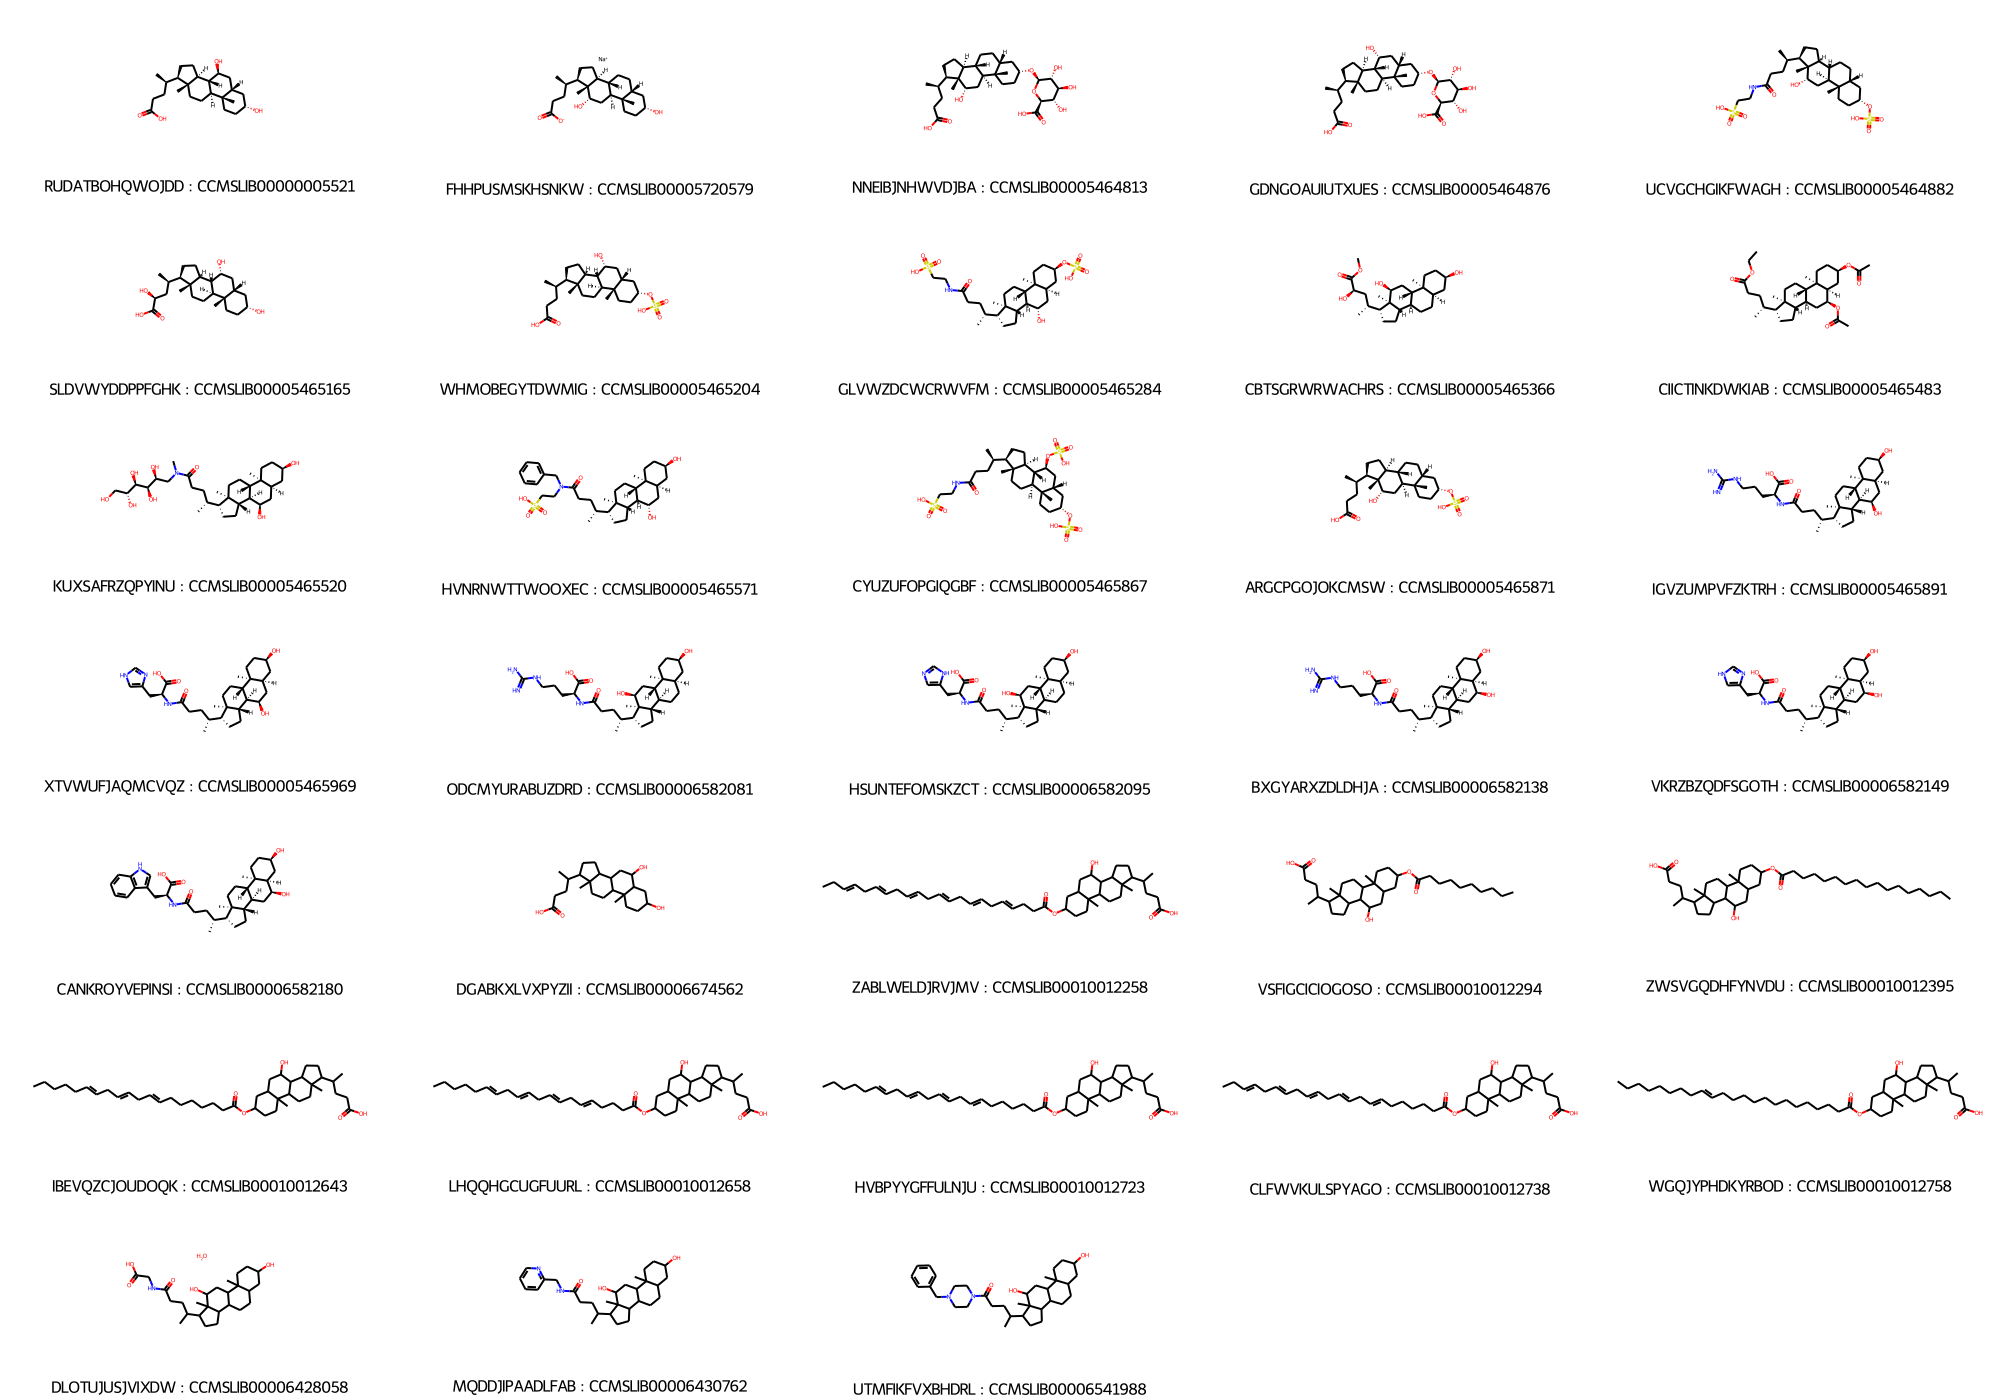

In [68]:
Draw.MolsToGridImage(outer_substructure_search_only_library_merged.mol,molsPerRow=5,subImgSize=(400,200), useSVG = False, maxMols=100,
                    legends=substruct_only_legend)

#### get list of spectrum_id to make USI links

In [69]:
full_usi_outer_substruct_search = [USI_link_beginning + spectrum_id for spectrum_id in outer_substructure_search_only_library_merged.spectrum_id.to_list()]

In [71]:
usi_outer_substruct_search = pd.DataFrame(full_usi_outer_substruct_search, columns=['usi'])

In [409]:
# original name: missed_DBA_msql_USI
usi_outer_substruct_search.to_csv("exclusively_substructure_search_Di_BA_msql_USI.csv")

## Section 7: Venn Diagram

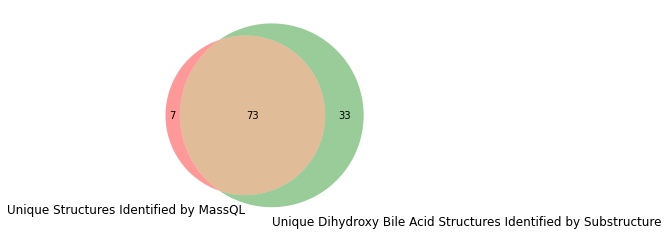

In [72]:
venn2(subsets = (len(outer_MassQL_only),len(outer_substructure_search_only),len(inner)),
      set_labels = ('Unique Structures Identified by MassQL', 'Unique Dihydroxy Bile Acid Structures Identified by Substructure'))

## Section 8: Barplot
- Barplot counts are from manual inspection of drawn structures

#### data for outer_MassQL_only barplot type

In [73]:
outer_MassQL_only_type = pd.DataFrame(index=range(0, 7), columns=['type'],
                  dtype='string')

In [74]:
outer_MassQL_only_type.iloc[0:1] = 'Non-Bile Acid'

outer_MassQL_only_type.iloc[1:5] = 'Mono'

outer_MassQL_only_type.iloc[5:6] = 'Di'

outer_MassQL_only_type.iloc[6:7] = 'Tri'

In [75]:
# dihydroxy-BA exclusively identified by MassQL is associated with di_3_4 structure
outer_MassQL_only_type.value_counts()

type         
Mono             4
Di               1
Non-Bile Acid    1
Tri              1
dtype: int64

#### data for outer_substructure_search_only_updated barplot type

In [76]:
outer_substructure_search_only_updated_type = pd.DataFrame(index=range(0, 33), columns=['type'],
                  dtype='string')

In [77]:
outer_substructure_search_only_updated_type.iloc[0:18] = 'Di_3_7'

outer_substructure_search_only_updated_type.iloc[18:28] = 'Di_3_12'

outer_substructure_search_only_updated_type.iloc[28:33] = 'Di_3_6'

In [78]:
outer_substructure_search_only_updated_type.value_counts()

type   
Di_3_7     18
Di_3_12    10
Di_3_6      5
dtype: int64

#### data for inner barplot type

In [79]:
inner_type = pd.DataFrame(index=range(0, 73), columns=['type'],
                  dtype='string')

In [80]:
inner_type.iloc[0:27] = 'Di_3_7'

In [81]:
inner_type.iloc[27:53] = 'Di_3_12'

In [82]:
inner_type.iloc[53:73] = 'Di_3_6'

In [83]:
inner_type.value_counts()

type   
Di_3_7     27
Di_3_12    26
Di_3_6     20
dtype: int64

#### plotting

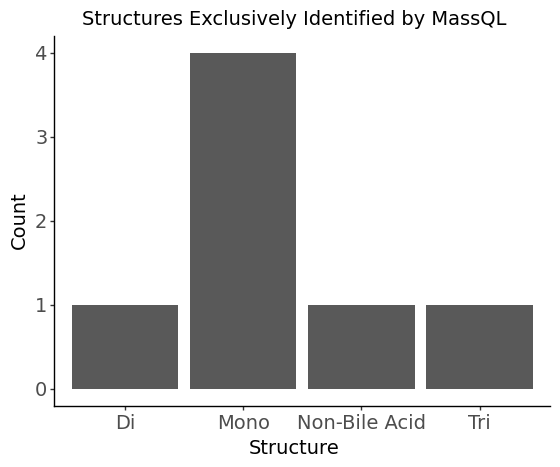

<ggplot: (8740420638417)>

In [90]:
ggplot(outer_MassQL_only_type) + geom_bar(aes(x='type')) + theme_classic() + xlab("Structure") + ylab("Count") + ggtitle("Structures Exclusively Identified by MassQL") + theme(text=element_text(size=14))

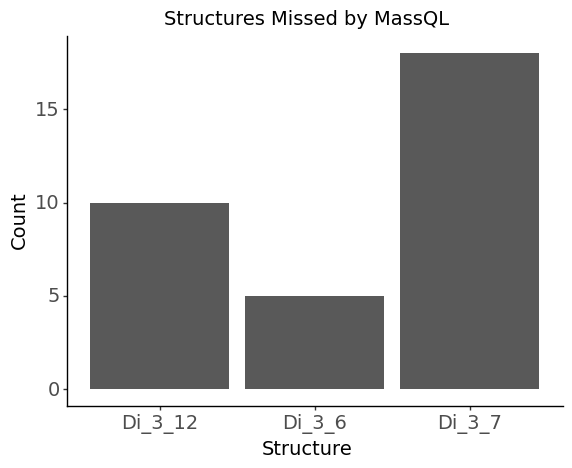

<ggplot: (8740420574160)>

In [91]:
ggplot(outer_substructure_search_only_updated_type) + geom_bar(aes(x='type')) + theme_classic() + xlab("Structure") + ylab("Count") + ggtitle("Structures Missed by MassQL") + theme(text=element_text(size=14))

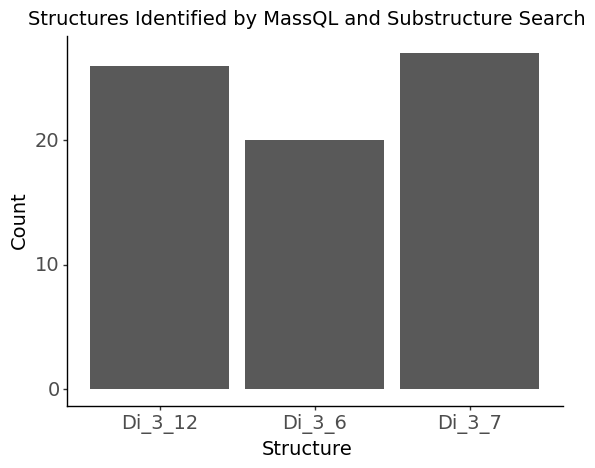

<ggplot: (8740420573314)>

In [92]:
ggplot(inner_type) + geom_bar(aes(x='type')) + theme_classic() + xlab("Structure") + ylab("Count") + ggtitle("Structures Identified by MassQL and Substructure Search") + theme(text=element_text(size=14))